# Churn prediction

Predict customer churn using the time as the last purchase
- Calculate the odds ratio and the log odds ratio
- Quantify the predictions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the ols functions
from statsmodels.formula.api import logit, ols
# Import qqplot
from statsmodels.api import qqplot
from statsmodels.graphics.mosaicplot import mosaic

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
churn = pd.read_csv("../data/churn.csv")
print(churn.head())

   has_churned  time_since_first_purchase  time_since_last_purchase
0            0                  -1.089221                 -0.721322
1            0                   1.182983                  3.634435
2            0                  -0.846156                 -0.427582
3            0                   0.086942                 -0.535672
4            0                  -1.166642                 -0.672640


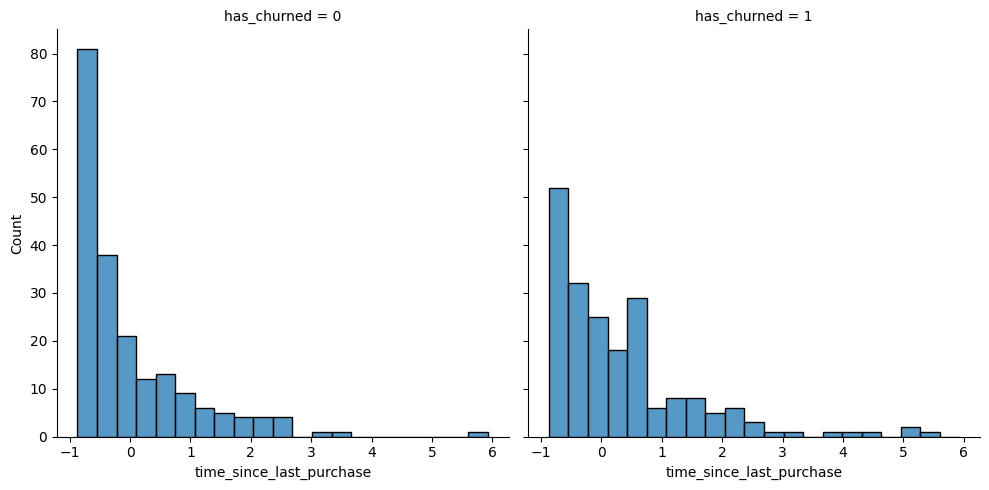

In [4]:
# Exploring the explanatory variables

# Histograms of time_since_last_purchase split by has_churned
sns.displot(x='time_since_last_purchase', col='has_churned', data=churn)
plt.show()

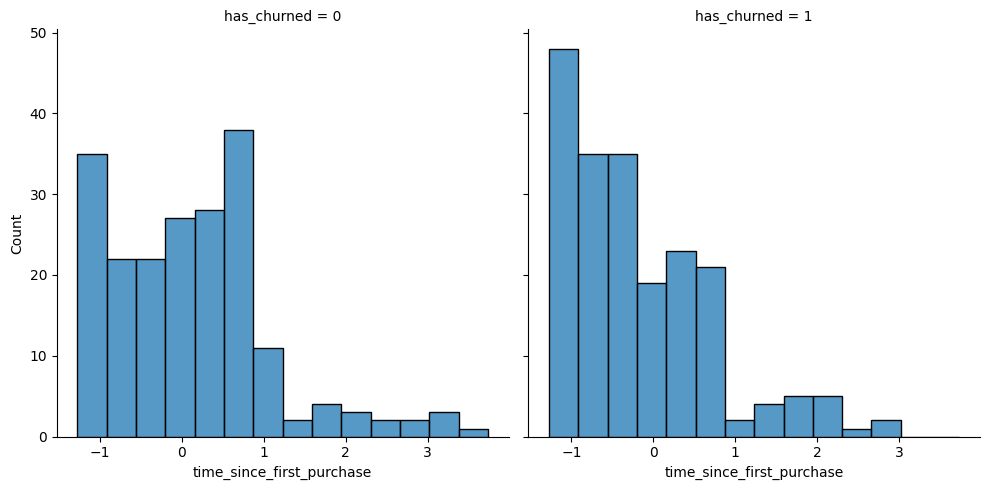

In [5]:
# Redraw the plot with time_since_first_purchase
sns.displot(x='time_since_first_purchase', col='has_churned', data=churn)
plt.show()

In [6]:
# The linear model
mdl_churn_vs_recency_lm = ols("has_churned ~ time_since_last_purchase",
                                   data=churn).fit()

print(mdl_churn_vs_recency_lm.params)
intercept, slope = mdl_churn_vs_recency_lm.params

Intercept                   0.490780
time_since_last_purchase    0.063783
dtype: float64


Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64


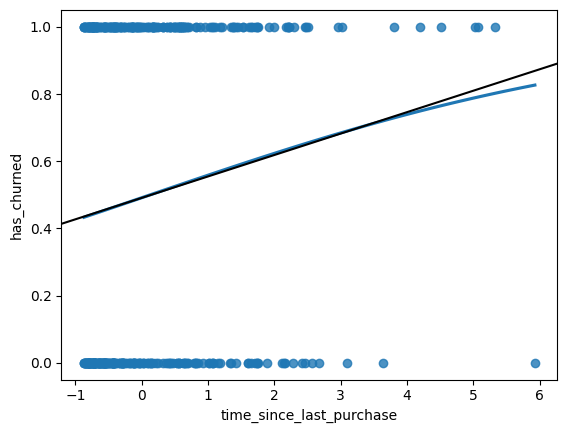

In [7]:
mdl_churn_vs_recency_logit = logit("has_churned ~ time_since_last_purchase",
                                   data=churn).fit()

print(mdl_churn_vs_recency_logit.params)

sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

plt.axline(xy1=(0, intercept),
           slope=slope,
           color="black")

plt.show()

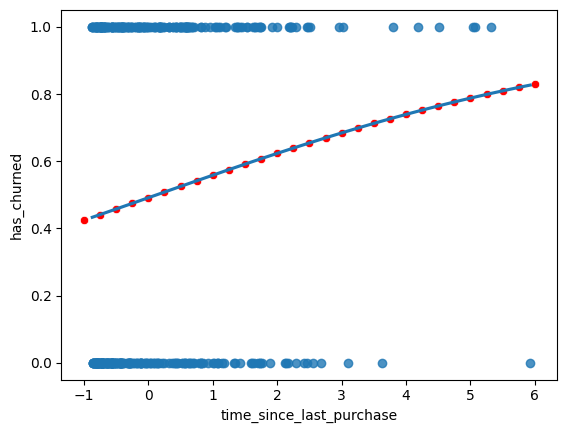

In [8]:
# Making predictionbs

explaratory_data = pd.DataFrame(
    {"time_since_last_purchase": np.arange(-1, 6.25, 0.25)}
)

prediction_data = explaratory_data.assign(
    has_churned = mdl_churn_vs_recency_logit.predict(explaratory_data)
)

sns.regplot(
    x="time_since_last_purchase",
    y="has_churned",
    data=churn,
    ci=None,
    logistic=True
)

sns.scatterplot(
    x="time_since_last_purchase",
    y="has_churned",
    data=prediction_data,
    color= "red"
)

plt.show()

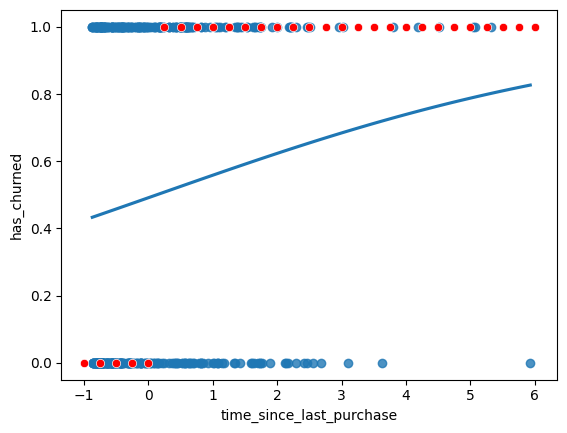

In [9]:
# Getting the most likely outcome
prediction_data = explaratory_data.assign(
    has_churned = mdl_churn_vs_recency_logit.predict(explaratory_data)
)
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"] )

sns.regplot(
    x="time_since_last_purchase",
    y="has_churned",
    data=churn,
    ci=None,
    logistic=True
)

sns.scatterplot(
    x="time_since_last_purchase",
    y="most_likely_outcome",
    data=prediction_data,
    color= "red"
)

plt.show()

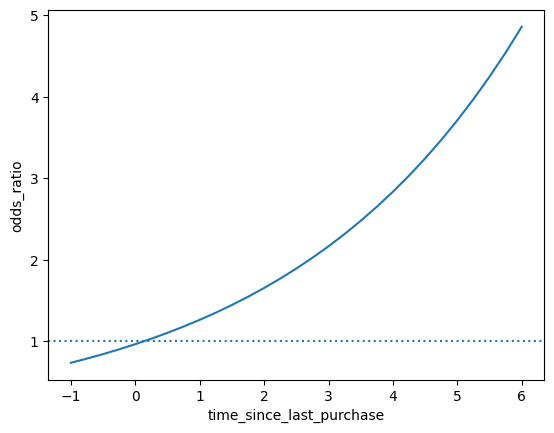

In [10]:
# Odds ratios = prob / (1- prob)
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

sns.lineplot(
    x="time_since_last_purchase",
    y="odds_ratio",
    data=prediction_data
)

plt.axhline(
    y=1,
    linestyle="dotted"
)

plt.show()

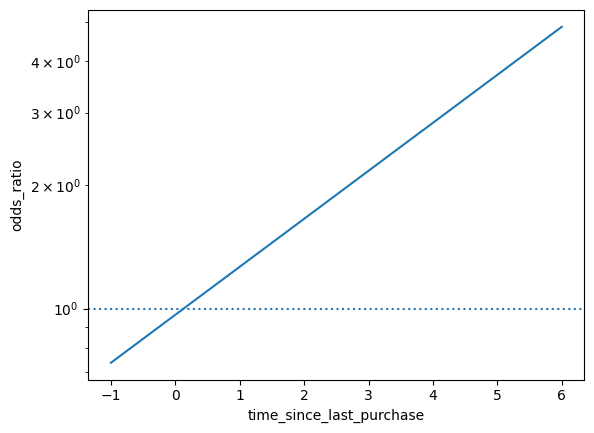

In [11]:
# Visualising log odds ratio
sns.lineplot(
    x="time_since_last_purchase",
    y="odds_ratio",
    data=prediction_data
)

plt.axhline(
    y=1,
    linestyle="dotted"
)

plt.yscale("log")

plt.show()

In [12]:
# Calculating log odds ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

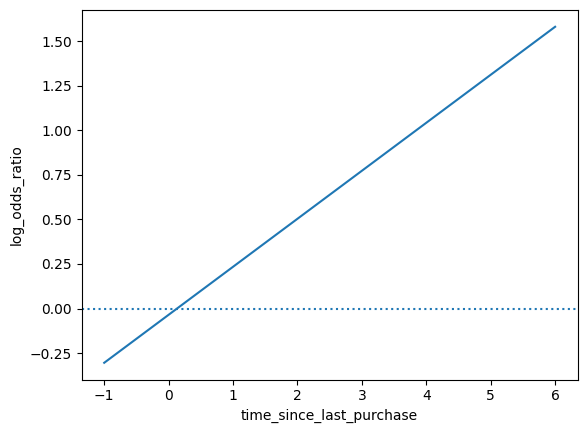

In [13]:
fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_last_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

In [24]:
# Quantifying logistic regression fit

actual_response = churn["has_churned"]
predicted_response = np.round(mdl_churn_vs_recency_logit.predict())
outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

print(outcomes.value_counts(sort=False))

actual_response  predicted_response
0                0.0                   141
                 1.0                    59
1                0.0                   111
                 1.0                    89
Name: count, dtype: int64


In [23]:
# visualising the confusion matrix

conf_matrix = mdl_churn_vs_recency_logit.pred_table()
print(conf_matrix)

[[141.  59.]
 [111.  89.]]


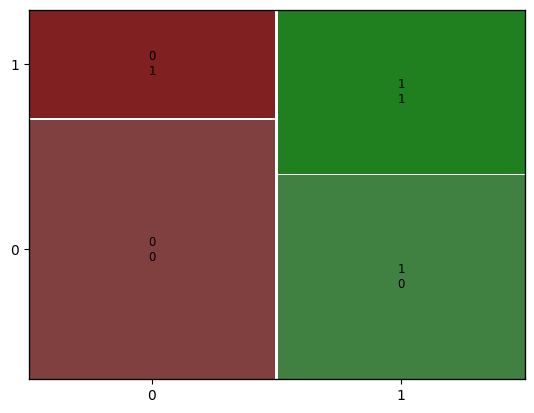

In [21]:
mosaic(conf_matrix)
plt.show()

# TN    TP
# FN    FP

---------

actual_response  predicted_response
0                0.0                   141
                 1.0                    59
1                0.0                   111
                 1.0                    89
Name: count, dtype: int64
[[141.  59.]
 [111.  89.]]


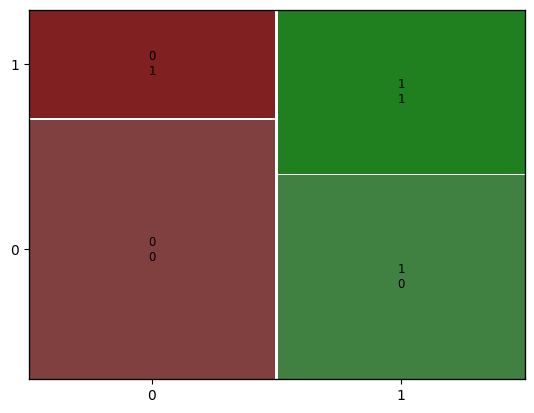

accuracy:  0.575
sensitivity:  0.445
specificity:  0.705


In [29]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_recency_logit.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response" : actual_response,
"predicted_response": predicted_response
})

# Print the outcomes
print(outcomes.value_counts(sort = False))

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_recency_logit.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)